In [1]:
%pip install h5py > None

Note: you may need to restart the kernel to use updated packages.


In [19]:
from utilities import load_data
from perceptron_simple import *

In [20]:
# @title Entrainement
x_train, y_train, x_test, y_test = load_data()

In [21]:
print(x_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


/home/jeanpetit/Bureau/Project/AI/deep learning/venv/lib/python3.8/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/tmp/ipykernel_4427/2901901481.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


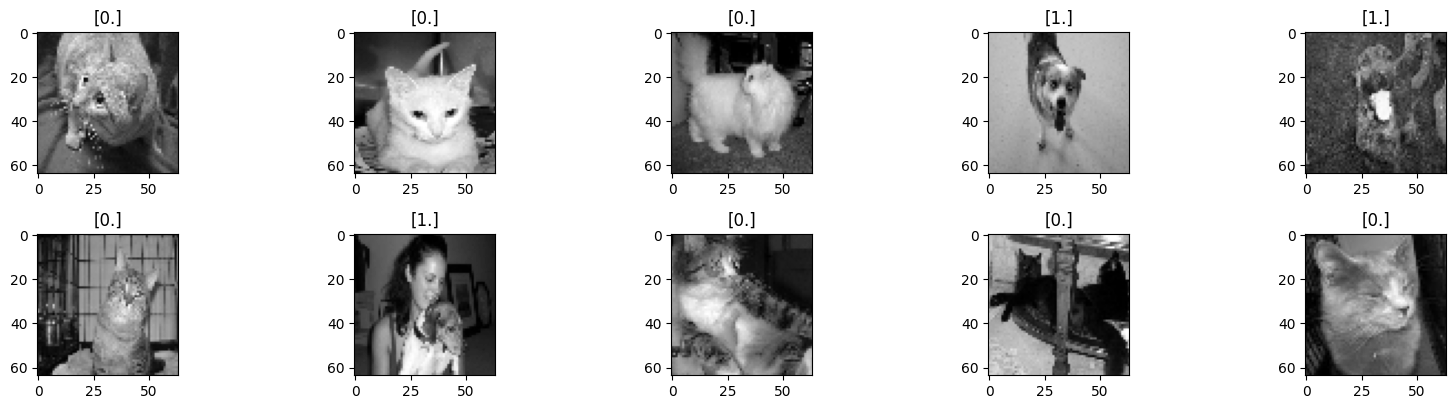

In [22]:
plt.figure(figsize=(16, 8))

for i in range(1, 11):
    plt.subplot(4, 5, i)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

## Model Training

### Reshape dimension of image in datasets an Normalize it
each image size of in datasets is 64X64 pixel then our model that we trained take as input a table at 2 dimensions then we have a x_train table at 3 dimensions

In [23]:
x_train_reshape = x_train.reshape(x_train.shape[0], -1) / x_train.max()
x_train.max()

254

In [24]:
x_train_reshape.max()

1.0

In [25]:
x_test_reshape = x_test.reshape(x_test.shape[0], -1) / x_train.max()
x_test_reshape.shape

(200, 4096)

[[1.37015495e-34]
 [4.24638858e-14]
 [1.44853548e-47]
 [2.51221527e-17]
 [6.89996541e-17]
 [7.27948797e-20]
 [4.89178800e-28]
 [6.38051155e-33]
 [1.89418307e-23]
 [6.47818478e-19]
 [2.14519768e-30]
 [8.53145085e-07]
 [4.54456715e-31]
 [4.83129790e-27]
 [2.46855180e-11]
 [2.04459162e-27]
 [2.70576660e-15]
 [1.28074150e-21]
 [4.45575620e-34]
 [3.78497957e-28]
 [3.54226321e-26]
 [3.75668091e-18]
 [6.28871478e-15]
 [9.83316933e-01]
 [2.60747786e-26]
 [7.20560171e-27]
 [6.93569803e-36]
 [2.37738575e-40]
 [2.36071458e-38]
 [4.28075795e-07]
 [1.08326299e-24]
 [1.34303256e-20]
 [1.99164188e-28]
 [5.37741347e-36]
 [4.51241168e-25]
 [4.50987610e-32]
 [3.75469232e-36]
 [9.19796846e-41]
 [1.35556150e-22]
 [1.28702248e-30]
 [1.72707488e-25]
 [8.55197471e-36]
 [1.00000000e+00]
 [2.88408841e-26]
 [1.99486446e-04]
 [1.18487175e-47]
 [1.72580324e-26]
 [3.04069209e-39]
 [5.83477946e-17]
 [2.56366259e-18]
 [1.49730987e-16]
 [2.03540563e-31]
 [1.11064509e-24]
 [5.92788185e-35]
 [8.52131443e-31]
 [5.135474

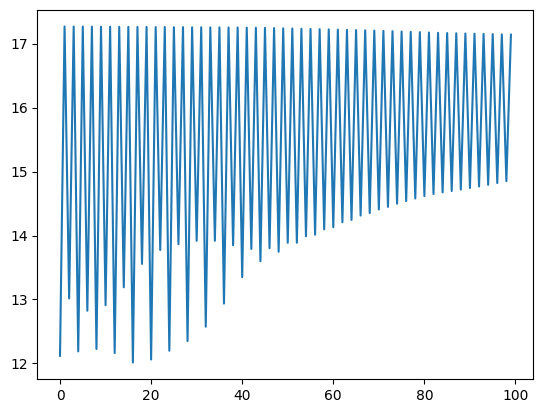

In [26]:
W,b = artificial_neuron(x_train_reshape, y_train)